In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.2)

**************************************************

Testing param sweep -- parcel wp

**************************************************

In [2]:
df = pd.read_csv("testing_scenario_parcel_prev2.0.csv")
df['NRecovered'] = df['FracRecovered']*df['NStaff']
df['Intros'] = (df['CustIntroFrac'] + df['ExtIntroFrac'])*df['NStaff']
df['NInfected'] = df['NRecovered'] - df['Intros']
dfwi = df[df['Intros'] > 0]
dfwi['WPvsIntroFrac'] = dfwi['NInfected']/dfwi['Intros']
print(len(df), ' ', len(dfwi))

3640000   3628383


/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
dfbaseline = dfwi.loc[lambda DF: (DF['protocol'] == 'No testing')]
dfball = dfbaseline.loc[lambda DF: (DF['Group'] == 'All')]

In [4]:
dftest = dfwi.loc[lambda DF: (DF['protocol'] != 'No testing')]
TProtos = np.unique(dftest["protocol"])
Delays = np.unique(dftest["delay"])
NCP = np.unique(dftest["new_comply_prob"])
Tperiod = np.unique(dftest["tperiod"])

print('II = ', np.unique(dftest["InfInit"]))
print('TD = ', np.unique(dftest["tD"]))
print('Phi = ', np.unique(dftest['phi']))
print('Pisol = ', np.unique(dftest['Pisol']))
print('Specificity = ', np.unique(dftest['specificity']))
print('Random contact rate = ', np.unique(dftest['p_contact']))
print('Friend contact prob = ', np.unique(dftest['p_friend_contact']))
print('Staff totals = ', np.unique(dftest['NStaff']))

II =  [0]
TD =  [0.25]
Phi =  [0.05]
Pisol =  [0.5]
Specificity =  [0.999]
Random contact rate =  [0.02941176]
Friend contact prob =  [1.]
Staff totals =  [10 20 38 68]


In [5]:
dfall = dftest.loc[dftest['Group']=='All',:]
dfall['scenario'] = np.zeros(len(dfall),dtype=np.object)
dfall.loc[lambda df: (df["protocol"]=='LFD_mass_testing'),'scenario'] = "LFD"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==0),'scenario'] = "PCR -- 0 delay"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==1),'scenario'] = "PCR -- 1 day delay"
dfall.loc[lambda df: (df["protocol"]=='PCR_mass_testing') &\
                     (df["delay"]==2),'scenario'] = "PCR -- 2 day delay"

print(sum(dfall['scenario'] == "LFD"))
print(sum(dfall['scenario'] == "PCR -- 0 delay"))
print(sum(dfall['scenario'] == "PCR -- 1 day delay"))
print(sum(dfall['scenario'] == "PCR -- 2 day delay"))


/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


210000
210000
210000
210000


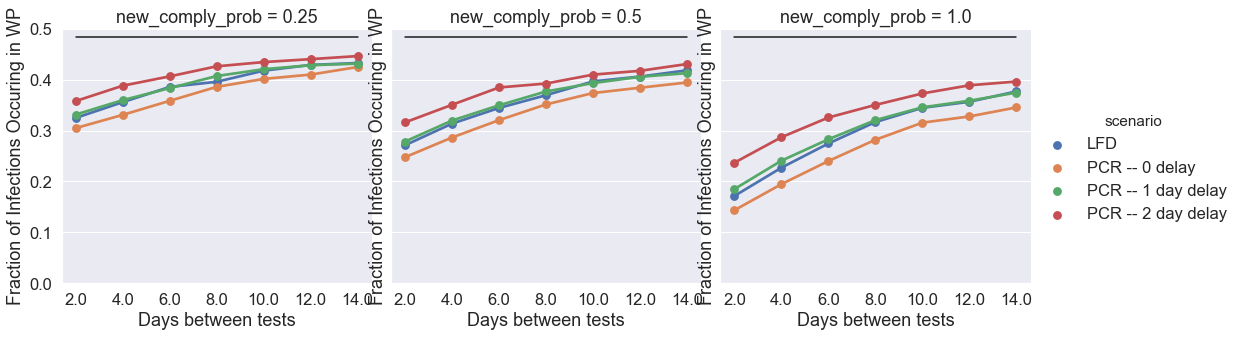

In [13]:
sp = sns.catplot(x="tperiod", y="WPvsIntroFrac",hue='scenario',col='new_comply_prob',data=dfall,kind='point')
sp.set(xlabel='Days between tests', ylabel='Fraction of Infections Occuring in WP',ylim=(0,0.5))
ax = sp.axes.flatten()
mean_baseline = np.mean(dfball['WPvsIntroFrac'])
for i in np.arange(3):
    ax[i].plot(Tperiod.astype("|S3"),mean_baseline*np.ones(len(Tperiod)),c='k')

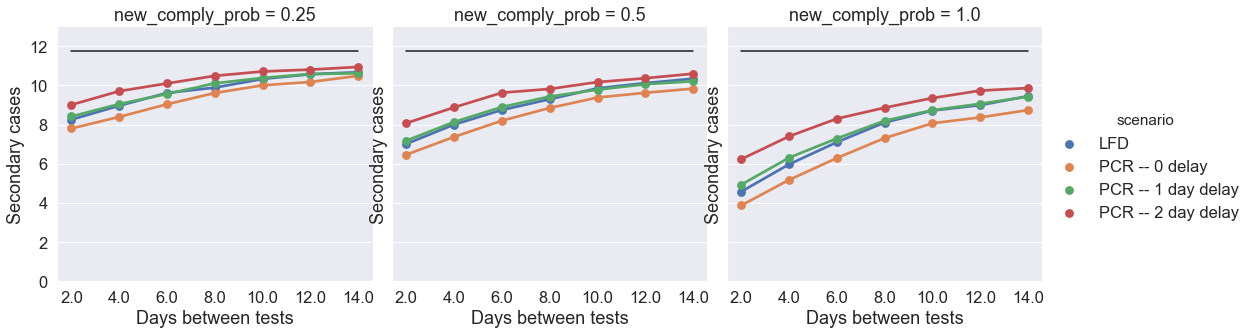

In [14]:
sp = sns.catplot(x="tperiod", y="NInfected",hue='scenario',col='new_comply_prob',data=dfall,kind='point')
sp.set(xlabel='Days between tests', ylabel='Secondary cases',ylim=(0,13.0))
ax = sp.axes.flatten()
mean_baseline = np.mean(dfball['NInfected'])
for i in np.arange(3):
    ax[i].plot(Tperiod.astype("|S3"),mean_baseline*np.ones(len(Tperiod)),c='k')

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


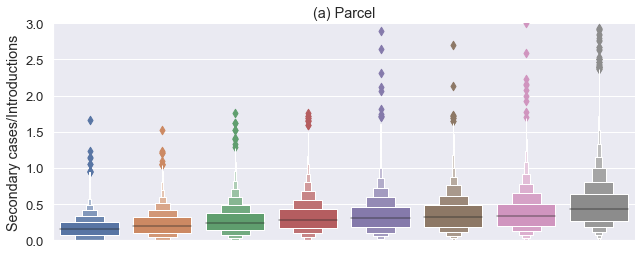

In [52]:
dfNCP1 = dfall.loc[lambda DF: (DF['scenario'] == 'LFD') &\
           (DF['new_comply_prob']==1)]
dfball['tperiod'] = 'No Testing'
dfNCP1 = pd.concat([dfNCP1, dfball])
sp = sns.catplot(x="tperiod", y="WPvsIntroFrac", data=dfNCP1, kind='boxen',height=4, aspect=9/4)
sp.set_xticklabels([None,None,None,None,None,None,None,None])
sp.set(xlabel=None,ylabel='Secondary cases/Introductions',ylim=(0,3),title='(a) Parcel')
sp.savefig('testing_highprev_secondary.png')

(0.0001, 0.15)

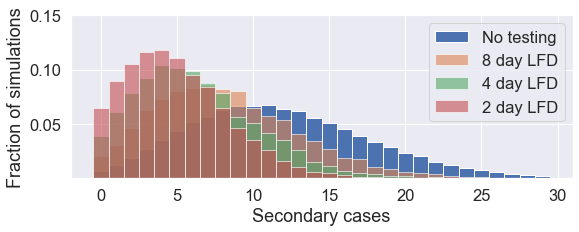

In [18]:
Nbins = np.arange(-0.5,30.5,1)
fig,ax = plt.subplots(figsize=(9,3))

ax.hist(dfball['NInfected'],bins=Nbins,label='No testing',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 8],bins=Nbins,alpha=0.6,label='8 day LFD',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 4],bins=Nbins,alpha=0.6,label='4 day LFD',density=True)
ax.hist(dfNCP1['NInfected'][dfNCP1['tperiod'] == 2],bins=Nbins,alpha=0.6,label='2 day LFD',density=True)
ax.legend()
ax.set_xlabel('Secondary cases')
ax.set_ylabel('Fraction of simulations')
ax.set_ylim(1E-4,0.15)
#ax.set_yscale('log')

## 

(0.0001, 0.2)

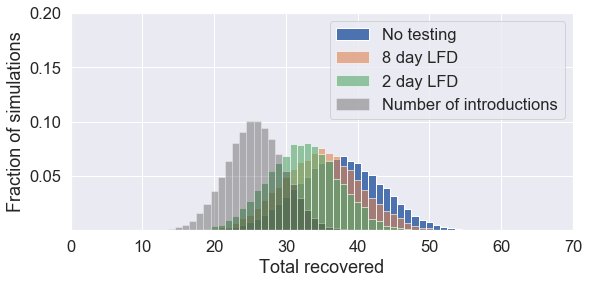

In [20]:
Nbins = np.arange(-0.5,68.5,1)
fig,ax = plt.subplots(figsize=(9,4))


ax.hist(dfball['NRecovered'],bins=Nbins,label='No testing',density=True)
ax.hist(dfNCP1['NRecovered'][dfNCP1['tperiod'] == 8],bins=Nbins,alpha=0.6,label='8 day LFD',density=True)
ax.hist(dfNCP1['NRecovered'][dfNCP1['tperiod'] == 2],bins=Nbins,alpha=0.6,label='2 day LFD',density=True)
ax.hist(dfball['Intros'],bins=Nbins,label='Number of introductions',density = True,alpha = 0.3, color='k')
ax.legend()
ax.set_xlabel('Total recovered')
ax.set_ylabel('Fraction of simulations')
ax.set_xlim(0,70)
ax.set_ylim(1E-4,0.2)

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


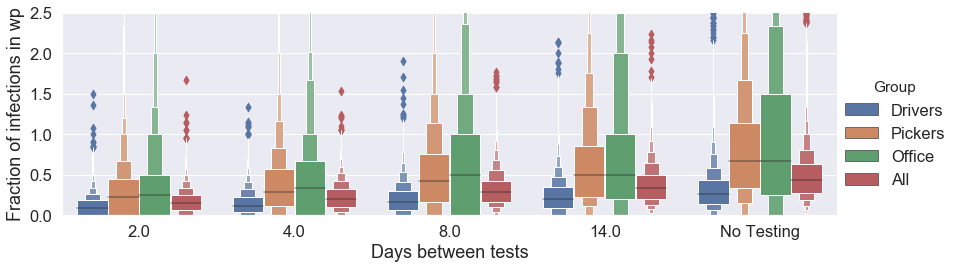

In [23]:
dfh = dfwi.loc[lambda DF: (DF["protocol"]=='LFD_mass_testing') & \
           ((DF['tperiod'] == 2) | (DF['tperiod'] == 4) | \
            (DF['tperiod'] == 8) | (DF['tperiod'] == 14)) &\
           (DF['new_comply_prob']==1)]
dfbaseline['tperiod'] = 'No Testing'
dfh= pd.concat([dfh, dfbaseline])
sp = sns.catplot(x="tperiod", y="WPvsIntroFrac", hue='Group', data=dfh, kind='boxen',height=4, aspect=12/4)
sp.set(xlabel='Days between tests',ylabel='Fraction of infections in wp',ylim=(0,2.5))

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


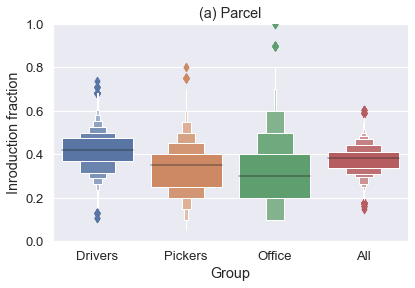

In [45]:
dfbaseline['IntroFrac'] = dfbaseline['Intros']/ dfbaseline['NStaff']
sp = sns.catplot(x="Group", y="IntroFrac", data=dfbaseline, kind='boxen',height=4, aspect=6/4)
sp.set(ylabel='Inroduction fraction',ylim=(0,1),title='(a) Parcel')
sp.savefig('Intro_frac.png')